<a href="https://colab.research.google.com/github/faizan-abbas-mir/TSD/blob/main/ARIMA%2BSARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
%matplotlib inline

In [3]:
df_airline= pd.read_csv('AirPassengers.csv')
df_airline.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df_airline.isnull().sum()

,0
Month,0
#Passengers,0


In [5]:
df_airline.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
df_airline.dropna(axis=1,inplace=True)
df_airline

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
 df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
df_airline.set_index('Month',inplace=True)

In [10]:
df_airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

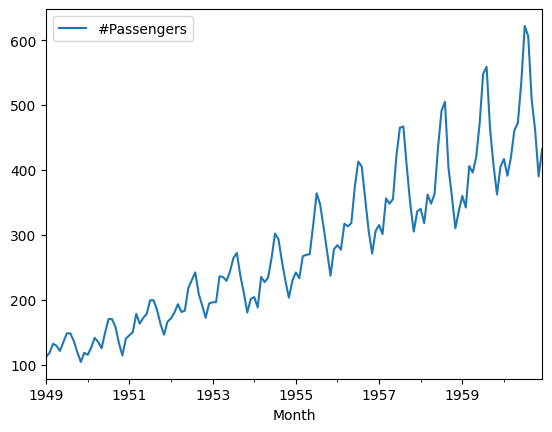

In [11]:
df_airline.plot()

here da6ta is seasional

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def adf_test(series):
  result= adfuller(series)
  print('ADF statistics:{}'.format(result[0]))
  print('P value:{}'.format (result[1]))
  if result[1]<=0.05:
    print('Reject null hypothesis')
  else:
    print('Fail to reject null hypothesis, not stationay')

In [14]:
adf_test(df_airline)

ADF statistics:0.8153688792060498
P value:0.991880243437641
Fail to reject null hypothesis, not stationay


In [15]:
df_airline['passenger first difference']=df_airline['#Passengers']- df_airline['#Passengers'].shift(1)

In [16]:
df_airline['passenger first difference']

,passenger first difference
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [17]:
adf_test(df_airline['passenger first difference'].dropna())

ADF statistics:-2.8292668241700047
P value:0.05421329028382478
Fail to reject null hypothesis, not stationay


In [18]:
df_airline['passenger second difference']=df_airline['passenger first difference']- df_airline['passenger first difference'].shift(1)

In [19]:
adf_test(df_airline['passenger second difference'].dropna())

ADF statistics:-16.384231542468513
P value:2.7328918500142026e-29
Reject null hypothesis


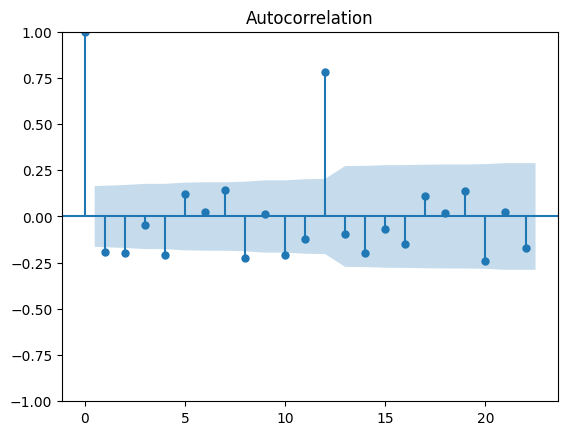

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf= plot_acf(df_airline['passenger second difference'].dropna())

In [21]:
### 12 time difference wil;l be done as it is seasonal data for 12 months
df_airline['passenger 12 difference']=df_airline['#Passengers']- df_airline['#Passengers'].shift(12)

In [22]:
adf_test(df_airline['passenger 12 difference'].dropna())

ADF statistics:-3.383020726492481
P value:0.011551493085514952
Reject null hypothesis


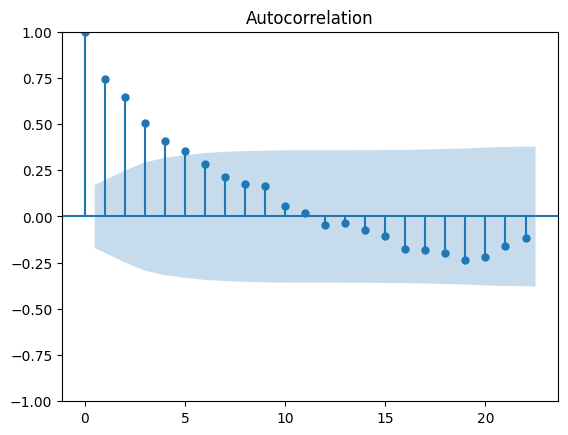

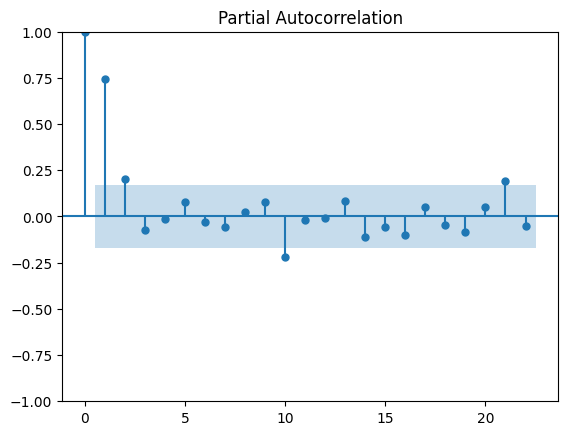

In [23]:
acf12 = plot_acf(df_airline['passenger 12 difference'].dropna())
pacf12= plot_pacf(df_airline['passenger 12 difference'].dropna())

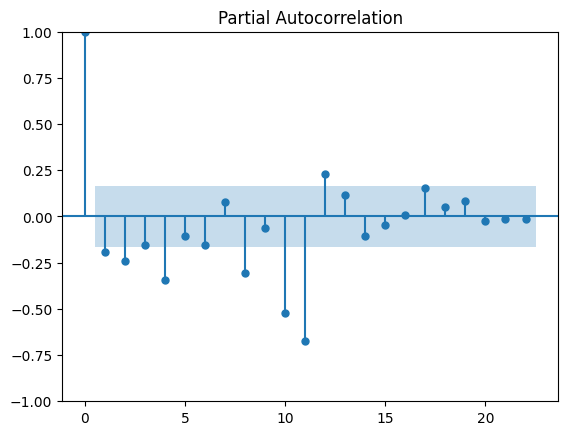

In [24]:
result=plot_pacf(df_airline['passenger second difference'].dropna())

In [25]:
df_airline

,#Passengers,passenger first difference,passenger second difference,passenger 12 difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [26]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [27]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [28]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [29]:
test_data

,#Passengers,passenger first difference,passenger second difference,passenger 12 difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [30]:
train_data

,#Passengers,passenger first difference,passenger second difference,passenger 12 difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347,-17.0,-66.0,54.0
1955-09-01,312,-35.0,-18.0,53.0
1955-10-01,274,-38.0,-3.0,45.0


In [31]:
from statsmodels.tsa.arima.model import ARIMA

In [32]:
model_ARIMA=ARIMA(train_data['#Passengers'],order=(12,2,0))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
model_Arima_fit=model_ARIMA.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                   84
Model:                ARIMA(12, 2, 0)   Log Likelihood                -309.988
Date:                Thu, 07 Aug 2025   AIC                            645.976
Time:                        16:32:15   BIC                            677.263
Sample:                    01-01-1949   HQIC                           658.537
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1707      0.123     -9.502      0.000      -1.412      -0.929
ar.L2         -1.2315      0.141     -8.755      0.000      -1.507      -0.956
ar.L3         -1.2109      0.141     -8.584      0.000      -1.487      -0.934
ar.L4         -1.2297      0.132     -9.349      0.000      -1.488      -0.972
ar.L5         -1.1712      0.147     -7.973      0.000      -1.459      -0.883
ar.L6         -1.1762      0.149     -7.900      0.000      -1.468      -0.884
ar.L7         -1.1442      0.152     -7.516      0.000      -1.443      -0.846
ar.L8         -1.2478      0.177     -7.032      0.000      -1.596      -0.900
ar.L9         -1.1562      0.172     -6.740      0.000      -1.492      -0.820
ar.L10        -1.2076      0.164     -7.384      0.000      -1.528      -0.887
ar.L11        -1.1056      0.161     -6.879      0.000      -1.421      -0.791
ar.L12        -0.2810      0.177     -1.590      0.112      -0.627       0.065
sigma2        93.9054     20.794      4.516      0.000      53.150     134.660
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.18
Prob(Q):                              0.90   Prob(JB):                         0.12
Heteroskedasticity (H):               2.17   Skew:                             0.55
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
test_data

,#Passengers,passenger first difference,passenger second difference,passenger 12 difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [36]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [37]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['#Passengers'].dropna()-pred

In [38]:
pred

,predicted_mean
1956-01-01,288.770238
1956-02-01,279.025222
1956-03-01,303.688955
1956-04-01,311.660093
1956-05-01,315.287644
1956-06-01,358.111009
1956-07-01,404.442421
1956-08-01,386.189050
1956-09-01,354.354777
1956-10-01,316.952786


In [39]:
residuals

,0
Month,
1956-01-01,-4.770238
1956-02-01,-2.025222
1956-03-01,13.311045
1956-04-01,1.339907
1956-05-01,2.712356
1956-06-01,15.888991
1956-07-01,8.557579
1956-08-01,18.810950
1956-09-01,0.645223


<Axes: ylabel='Density'>

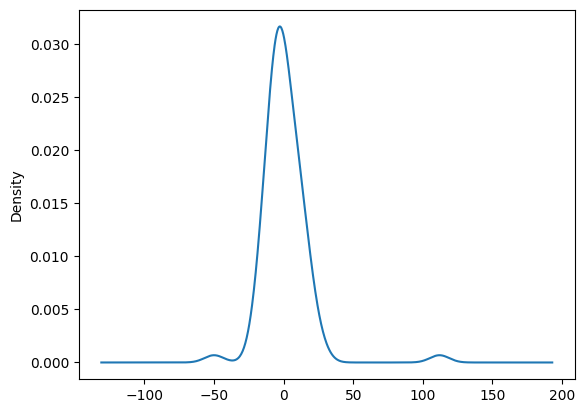

In [40]:
model_Arima_fit.resid.plot(kind='kde')

In [41]:
test_data['Predicted_ARIMA']=pred

/tmp/ipython-input-95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

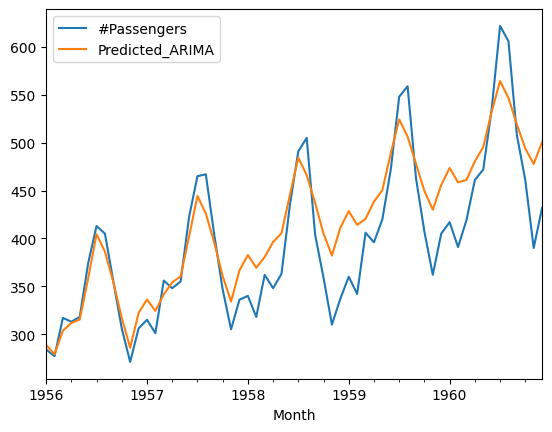

In [43]:
test_data[['#Passengers','Predicted_ARIMA']].plot()

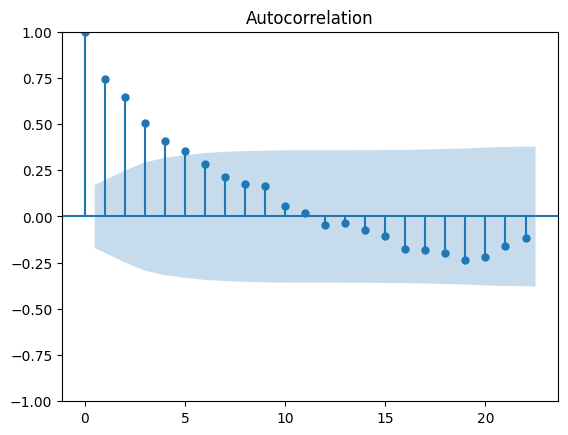

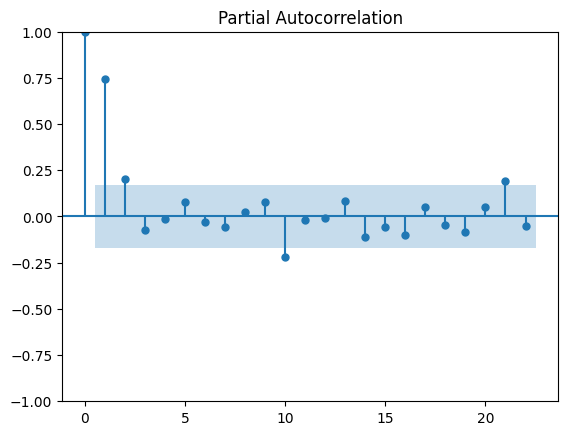

In [47]:
acf12 = plot_acf(df_airline["passenger 12 difference"].dropna())
pacf12 = plot_pacf(df_airline["passenger 12 difference"].dropna())

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
model_SARIMA=SARIMAX(train_data['#Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [51]:
model_SARIMA_fit=model_SARIMA.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Thu, 07 Aug 2025   AIC                            548.480
Time:                                     16:36:19   BIC                            568.970
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5974      0.937      0.637      0.524      -1.240       2.434
ar.L2          0.8310      0.232      3.584      0.000       0.377       1.285
ar.L3         -0.4516      0.893     -0.505      0.613      -2.203       1.299
ma.L1          0.1847      1.167      0.158      0.874      -2.103       2.472
ma.L2         -0.5333      1.265     -0.422      0.673      -3.012       1.945
ma.L3         -0.0988      0.385     -0.256      0.798      -0.854       0.656
ma.L4         -0.1275      0.339     -0.376      0.707      -0.792       0.537
ma.L5          0.2470      0.358      0.691      0.490      -0.454       0.948
sigma2        87.7349     81.586      1.075      0.282     -72.170     247.640
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
test_data.tail()

,#Passengers,passenger first difference,passenger second difference,passenger 12 difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,546.718701
1960-09-01,508,-98.0,-82.0,45.0,519.076720
1960-10-01,461,-47.0,51.0,54.0,494.057033
1960-11-01,390,-71.0,-24.0,28.0,477.778949
1960-12-01,432,42.0,113.0,27.0,500.610886


In [54]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [56]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['#Passengers']-pred_Sarima

<Axes: xlabel='Month'>

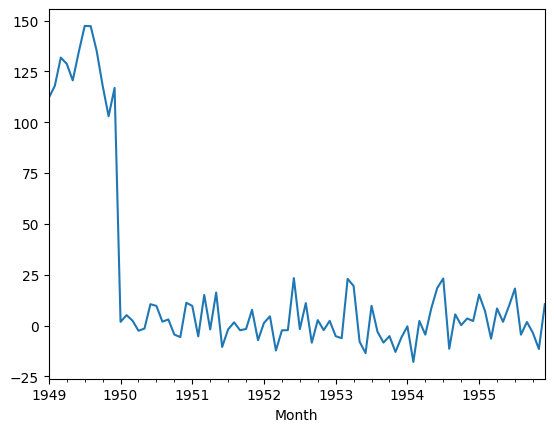

In [57]:
model_SARIMA_fit.resid.plot()

<Axes: xlabel='Month'>

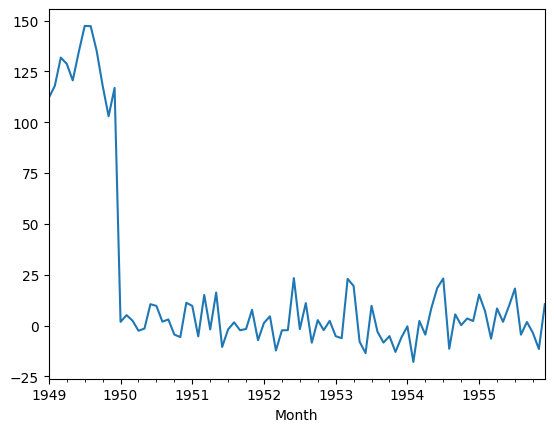

In [58]:
model_SARIMA_fit.resid.plot()

In [59]:
test_data['Predicted_SARIMA']=pred_Sarima

/tmp/ipython-input-1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [60]:
test_data

,#Passengers,passenger first difference,passenger second difference,passenger 12 difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284,6.0,-35.0,42.0,288.770238,NaN
1956-02-01,277,-7.0,-13.0,44.0,279.025222,NaN
1956-03-01,317,40.0,47.0,50.0,303.688955,NaN
1956-04-01,313,-4.0,-44.0,44.0,311.660093,NaN
1956-05-01,318,5.0,9.0,48.0,315.287644,NaN
1956-06-01,374,56.0,51.0,59.0,358.111009,NaN
1956-07-01,413,39.0,-17.0,49.0,404.442421,403.400398
1956-08-01,405,-8.0,-47.0,58.0,386.189050,385.073462
1956-09-01,355,-50.0,-42.0,43.0,354.354777,349.449217


<Axes: xlabel='Month'>

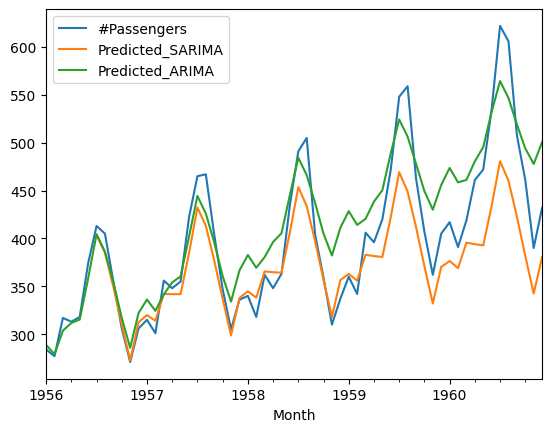

In [61]:
test_data[['#Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()
